In [246]:
# Import libraries
import pandas as pd
import numpy as np
import os
import csv
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
# Creation of dataframes of the different csv files
dataframes = []
for dirname, _, filenames in os.walk('./datasets/1_SEGMENTATION'):
    for filename in filenames:
        file = filename.replace('.csv', '_df')
        filepath = os.path.join(dirname, filename)
        # Sniff the delimiter using csv.Sniffer
        with open(filepath, 'r', newline='') as csvfile:
            sniffer = csv.Sniffer()
            dialect = sniffer.sniff(csvfile.read(4096))  # Read a sample to sniff
            separator = dialect.delimiter
        # Read the CSV file with the detected separator
        df = pd.read_csv(filepath, sep=separator, encoding="UTF-8")
        globals()[file] = df.copy()
        dataframes.append(df)
        print(file,'-','\n','Rows:',df.shape[0],'\n','Columns:',df.shape[1])
print('Data imported')

RETAIL.txt - 
 Rows: 20 
 Columns: 1
RETAIL_PRODUCT_df - 
 Rows: 2800 
 Columns: 3
RETAIL_REGISTRY_df - 
 Rows: 25727 
 Columns: 4
RETAIL_SALES_df - 
 Rows: 489967 
 Columns: 6
RETAIL_SALES_DETAIL_df - 
 Rows: 2047073 
 Columns: 6
Data imported


In [3]:
# Assigning the dataframes to the corresponding variables
rp_df = RETAIL_PRODUCT_df
rr_df = RETAIL_REGISTRY_df
rs_df = RETAIL_SALES_df
rsd_df = RETAIL_SALES_DETAIL_df

In [8]:
# Merge the dataframes to create a unique dataframe
df = rsd_df.merge(rs_df, how = 'inner', on = ['CUSTOMER_ID', 'DATE'] )

In [108]:
# Merge the retail sales and retail sales detail to retail product
df = df.merge(rp_df, how = 'inner', on = ['PRODUCT_ID'], )
df.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,...,WEEKDAY,POINTS_SPENT,TRANSACTION_TYPE,TRANSACTION_VALUE,ORIGIN_,PAYMENT_METHOD_,BILL_NO,DATE2,CATEGORY_ID,CATEGORY_DESC
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960,...,4,3960,2,6.85,3,0,1,2020-01-17,3,READY-MADE
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315,...,4,0,2,6.65,3,0,81,2018-11-09,3,READY-MADE
2,YZ04586406,2019-12-12,1068,2.0,13.70,0,85,CASH,12:21:48,775,...,3,0,2,27.40,1,0,3150,2019-12-12,3,READY-MADE
3,MU02657289,2019-09-27,1068,1.0,6.85,0,14,DEBIT CARD,11:49:35,465,...,4,0,2,6.85,3,3,3197,2019-09-27,3,READY-MADE
4,MU02657289,2018-10-26,1068,1.0,6.65,0,14,CASH,15:57:30,220,...,4,0,2,6.65,3,0,3211,2018-10-26,3,READY-MADE


In [12]:
# Merge df to retail registry
df = df.merge(rr_df, how = 'inner', on = ['CUSTOMER_ID'])

In [10]:
# Fill the missing values with 0 in the special column
df['SPECIAL'] = df['SPECIAL'].fillna(0)

In [13]:
# Replace the values of the column special with 1 if the value is different from 0
df['SPECIAL'].replace({'Y': 1}, inplace = True)
df.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CREATION_DATE_x,REGIONAL_CODE_x,ORIGIN_x,CREATION_DATE_y,REGIONAL_CODE_y,ORIGIN_y
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960.0,2003-04-02,23,WEB,2003-04-02,23,WEB
1,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960.0,2003-04-02,23,WEB,2003-04-02,23,WEB
2,BF00404312,2020-01-17,224046,1.0,4.95,0,14,CASH,15:06:37,-3960.0,2003-04-02,23,WEB,2003-04-02,23,WEB
3,BF00404312,2020-01-17,17284,1.0,5.25,0,14,CASH,15:06:37,-3960.0,2003-04-02,23,WEB,2003-04-02,23,WEB
4,BF00404312,2020-01-17,130905,1.0,5.95,0,14,CASH,15:06:37,-3960.0,2003-04-02,23,WEB,2003-04-02,23,WEB


In [14]:
check1 = df.loc[df['SPECIAL'] == '1']
check1.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CREATION_DATE_x,REGIONAL_CODE_x,ORIGIN_x,CREATION_DATE_y,REGIONAL_CODE_y,ORIGIN_y


In [16]:
# Descibe the dataframe
df.describe()

,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,TOTAL_POINTS,REGIONAL_CODE_x,REGIONAL_CODE_y
count,2.051168e+06,2.051168e+06,2.029458e+06,2.051168e+06,2.051168e+06,1.997038e+06,2.051168e+06,2.051168e+06
mean,7.393177e+04,1.136572e+00,8.094732e+00,1.848215e-03,4.939931e+01,8.688460e+01,3.144132e+01,3.144132e+01
std,7.768795e+04,1.714599e+00,5.665794e+00,4.295114e-02,3.592152e+01,1.643364e+03,1.971011e+01,1.971011e+01
min,-1.200000e+01,-4.800000e+01,-3.048000e+02,0.000000e+00,0.000000e+00,-1.469150e+05,1.000000e+00,1.000000e+00
25%,2.942000e+03,1.000000e+00,4.950000e+00,0.000000e+00,1.700000e+01,1.650000e+02,1.300000e+01,1.300000e+01
50%,4.415400e+04,1.000000e+00,6.950000e+00,0.000000e+00,3.800000e+01,2.850000e+02,3.000000e+01,3.000000e+01
75%,1.387970e+05,1.000000e+00,9.950000e+00,0.000000e+00,8.100000e+01,4.400000e+02,4.700000e+01,4.700000e+01
max,2.537530e+05,1.000000e+03,3.704500e+02,1.000000e+00,1.410000e+02,9.180000e+03,8.200000e+01,8.200000e+01


In [15]:
# Descriptive statistics of the dataframe
df.describe(include = 'object')

,CUSTOMER_ID,DATE,PAYMENT_METHOD,TIME,CREATION_DATE_x,ORIGIN_x,CREATION_DATE_y,ORIGIN_y
count,2051168,2051168,2051168,2051168,2049919,2051168,2049919,2051168
unique,25727,498,5,45235,6130,4,6130,4
top,OV00324640,2019-11-13,CASH,11:34:47,2003-03-20,WEB,2003-03-20,WEB
freq,938,6861,1313910,172,2855,1375149,2855,1375149


In [17]:
# Find the isnan values in the dataframe
df.isna().sum()

CUSTOMER_ID            0
DATE                   0
PRODUCT_ID             0
QUANTITY               0
LIST_PRICE         21710
SPECIAL                0
OUTLET_ID              0
PAYMENT_METHOD         0
TIME                   0
TOTAL_POINTS       54130
CREATION_DATE_x     1249
REGIONAL_CODE_x        0
ORIGIN_x               0
CREATION_DATE_y     1249
REGIONAL_CODE_y        0
ORIGIN_y               0
dtype: int64

In [20]:
# Fill the TOTAL_POINTS and LIST_PRICE column na values with 0
df['TOTAL_POINTS'] = df['TOTAL_POINTS'].fillna(0)
df['LIST_PRICE'] = df['LIST_PRICE'].fillna(0)

In [21]:
# Convert date to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

In [29]:
# Merge the columns of creation_date_x and creation_date_y to a single column CREATION_DATE based on the id
df['CREATION_DATE'] = df['CREATION_DATE_x'].fillna(df['CREATION_DATE_y'])

# Drop the columns that are not necessary
df = df.drop(['CREATION_DATE_x', 'CREATION_DATE_y'], axis = 1)

In [30]:
# Merge the columns of regional_code_x and regional_code_y to a single column REGIONAL_CODE based on the id
df['REGIONAL_CODE'] = df['REGIONAL_CODE_x'].fillna(df['REGIONAL_CODE_y'])

# Drop the columns that are not necessary
df = df.drop(['REGIONAL_CODE_x', 'REGIONAL_CODE_y'], axis = 1)

In [32]:
# Merge the columns ORIGIN_x and ORIGIN_y to a single column ORIGIN based on the id
df['ORIGIN'] = df['ORIGIN_x'].fillna(df['ORIGIN_y'])

# Drop the columns that are not necessary
df = df.drop(['ORIGIN_x', 'ORIGIN_y'], axis = 1)

In [33]:
df.isna().sum()

CUSTOMER_ID          0
DATE                 0
PRODUCT_ID           0
QUANTITY             0
LIST_PRICE           0
SPECIAL              0
OUTLET_ID            0
PAYMENT_METHOD       0
TIME                 0
TOTAL_POINTS         0
CREATION_DATE     1249
REGIONAL_CODE        0
ORIGIN               0
dtype: int64

In [34]:
# Fill the NaN values in CREATION_DATE with the earliest date in the DATE column based on the CUSTOMER_ID
df['CREATION_DATE'] = df['CREATION_DATE'].fillna(df.groupby('CUSTOMER_ID')['DATE'].transform('min'))

In [35]:
# Check the datatypes of the columns
df.dtypes

CUSTOMER_ID               object
DATE              datetime64[ns]
PRODUCT_ID                 int64
QUANTITY                 float64
LIST_PRICE               float64
SPECIAL                    int64
OUTLET_ID                  int64
PAYMENT_METHOD            object
TIME                      object
TOTAL_POINTS             float64
CREATION_DATE             object
REGIONAL_CODE              int64
ORIGIN                    object
dtype: object

In [36]:
# Convert CREATION_DATE to datetime
df['CREATION_DATE'] = pd.to_datetime(df['CREATION_DATE'])

In [37]:
# Confirm the dtypes
df.dtypes

CUSTOMER_ID               object
DATE              datetime64[ns]
PRODUCT_ID                 int64
QUANTITY                 float64
LIST_PRICE               float64
SPECIAL                    int64
OUTLET_ID                  int64
PAYMENT_METHOD            object
TIME                      object
TOTAL_POINTS             float64
CREATION_DATE     datetime64[ns]
REGIONAL_CODE              int64
ORIGIN                    object
dtype: object

In [40]:
# Define the specific date
specific_date = datetime(2020, 1, 26)

# Determination of a customer's longevity based on the difference between the date of the first purchase and the date a custom date
df['LONGEVITY'] = (specific_date - df['CREATION_DATE']) // pd.Timedelta(days=365.25)

# If the customer doesn't have a CREATION_DATE, the LONGEVITY is earliest date per the CUSTOMER_ID
df['LONGEVITY'] = df['LONGEVITY'].fillna(df.groupby('CUSTOMER_ID')['LONGEVITY'].transform(lambda x: x.fillna(x.min())))

In [44]:
# Extract the hour from the LONGEVITY column and convert it to int
def extract_hour(time_str):
    return int(time_str.split(':')[0])

df['TRANSACTION_HOUR'] = df['TIME'].apply(extract_hour)

# Add a column that shows the hour of the transaction as a period in the day (morning, afternoon, evening, night)
def time_of_day(hour):
    if hour >= 6 and hour < 12:
        return 'morning'
    elif hour >= 12 and hour < 18:
        return 'afternoon'
    elif hour >= 18 and hour < 24:
        return 'evening'
    else:
        return 'night'
    
df['TIME_OF_DAY'] = df['TRANSACTION_HOUR'].apply(time_of_day)

# Add another column that shows the day of the week and weekday
df['WEEKDAY'] = df['DATE'].dt.weekday
df['DAY_OF_WEEK'] = df['DATE'].dt.day_name()

# Add another column that shows the month of the year
df['MONTH'] = df['DATE'].dt.month_name()

df.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CREATION_DATE,REGIONAL_CODE,ORIGIN,LONGEVITY,TRANSACTION_HOUR,TIME_OF_DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960.0,2003-04-02,23,WEB,16,15,afternoon,Friday,January,4
1,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960.0,2003-04-02,23,WEB,16,15,afternoon,Friday,January,4
2,BF00404312,2020-01-17,224046,1.0,4.95,0,14,CASH,15:06:37,-3960.0,2003-04-02,23,WEB,16,15,afternoon,Friday,January,4
3,BF00404312,2020-01-17,17284,1.0,5.25,0,14,CASH,15:06:37,-3960.0,2003-04-02,23,WEB,16,15,afternoon,Friday,January,4
4,BF00404312,2020-01-17,130905,1.0,5.95,0,14,CASH,15:06:37,-3960.0,2003-04-02,23,WEB,16,15,afternoon,Friday,January,4


In [45]:
# Convert total points to int
df['TOTAL_POINTS'] = df['TOTAL_POINTS'].astype(int)

In [46]:
# Calculation of the absolute sum of negative values in the column TOTAL_POINTS for each CUSTOMER_ID
df['POINTS_SPENT'] = df['TOTAL_POINTS'].apply(lambda x: abs(x) if x < 0 else 0)

In [48]:
# Creation of dataframe of POINTS_SPENT per CUSTOMER_ID
points_spent_df = df.groupby('CUSTOMER_ID')['POINTS_SPENT'].sum().reset_index()
points_spent_df.head()

,CUSTOMER_ID,POINTS_SPENT
0,AA00312188,8760
1,AA00312390,2240
2,AA00325975,80675
3,AA00336843,24255
4,AA00339761,4030


In [128]:
# Processing of loyalty points
loyalty = points_spent_df.copy()
loyalty['loyalty_score'] = loyalty['POINTS_SPENT'].apply(lambda x: 1 if x > 0 else 0)
loyalty.head()

,CUSTOMER_ID,POINTS_SPENT,loyalty_score
0,AA00312188,8760,1
1,AA00312390,2240,1
2,AA00325975,80675,1
3,AA00336843,24255,1
4,AA00339761,4030,1


In [50]:
# Creation of new column TRANSACTION_TYPE determined by the following conditions
# If the value in the column QUANTITY is less than or equal to 0 or LIST_PRICE is less than 0, the TRANSACTION_TYPE is 'RETURNED' stored as 0
# If the value in the column QUANTITY is greater than 0 and LIST_PRICE is equal to 0, the TRANSACTION_TYPE is 'PROMOTION' stored as 1
# else the TRANSACTION_TYPE is 'PURCHASE' stored as 2
df['TRANSACTION_TYPE'] = np.where((df['QUANTITY'] <= 0) | (df['LIST_PRICE'] < 0), 0, np.where((df['QUANTITY'] > 0) & (df['LIST_PRICE'] == 0), 1, 2))
df.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,...,REGIONAL_CODE,ORIGIN,LONGEVITY,TRANSACTION_HOUR,TIME_OF_DAY,DAY_OF_WEEK,MONTH,WEEKDAY,POINTS_SPENT,TRANSACTION_TYPE
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960,...,23,WEB,16,15,afternoon,Friday,January,4,3960,2
1,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960,...,23,WEB,16,15,afternoon,Friday,January,4,3960,2
2,BF00404312,2020-01-17,224046,1.0,4.95,0,14,CASH,15:06:37,-3960,...,23,WEB,16,15,afternoon,Friday,January,4,3960,2
3,BF00404312,2020-01-17,17284,1.0,5.25,0,14,CASH,15:06:37,-3960,...,23,WEB,16,15,afternoon,Friday,January,4,3960,2
4,BF00404312,2020-01-17,130905,1.0,5.95,0,14,CASH,15:06:37,-3960,...,23,WEB,16,15,afternoon,Friday,January,4,3960,2


In [52]:
# Determination of the transaction value via the absolute values of QUANTITY and LIST_PRICE
# Uncomment to run
# df['TRANSACTION_VALUE'] = None

# # Iterate over each row
# for index, row in df.iterrows():
#     if row['TRANSACTION_TYPE'] == 1 or row['TRANSACTION_TYPE'] == 2:
#         df.at[index, 'TRANSACTION_VALUE'] = abs(row['LIST_PRICE']) * abs(row['QUANTITY'])
#     else:
#         df.at[index, 'TRANSACTION_VALUE'] = -(abs(row['LIST_PRICE']) * abs(row['QUANTITY']))

# df.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,...,ORIGIN,LONGEVITY,TRANSACTION_HOUR,TIME_OF_DAY,DAY_OF_WEEK,MONTH,WEEKDAY,POINTS_SPENT,TRANSACTION_TYPE,TRANSACTION_VALUE
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960,...,WEB,16,15,afternoon,Friday,January,4,3960,2,6.85
1,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960,...,WEB,16,15,afternoon,Friday,January,4,3960,2,6.25
2,BF00404312,2020-01-17,224046,1.0,4.95,0,14,CASH,15:06:37,-3960,...,WEB,16,15,afternoon,Friday,January,4,3960,2,4.95
3,BF00404312,2020-01-17,17284,1.0,5.25,0,14,CASH,15:06:37,-3960,...,WEB,16,15,afternoon,Friday,January,4,3960,2,5.25
4,BF00404312,2020-01-17,130905,1.0,5.95,0,14,CASH,15:06:37,-3960,...,WEB,16,15,afternoon,Friday,January,4,3960,2,5.95


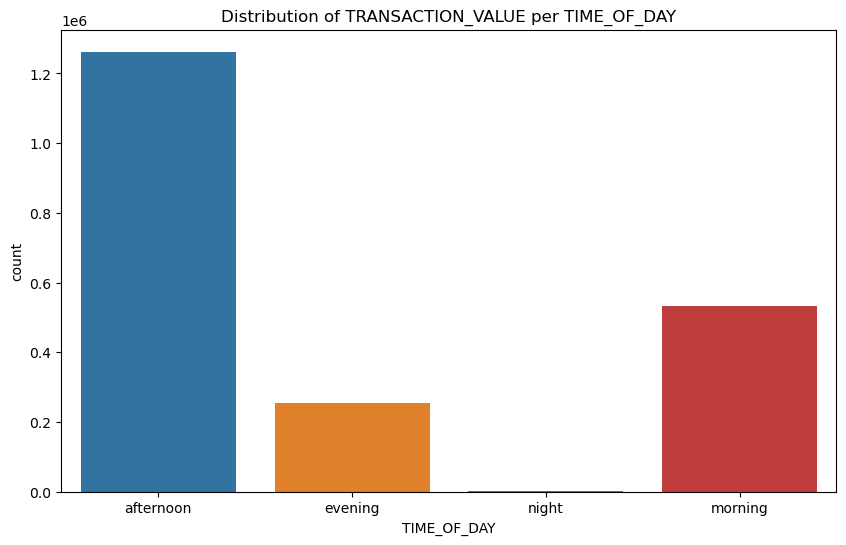

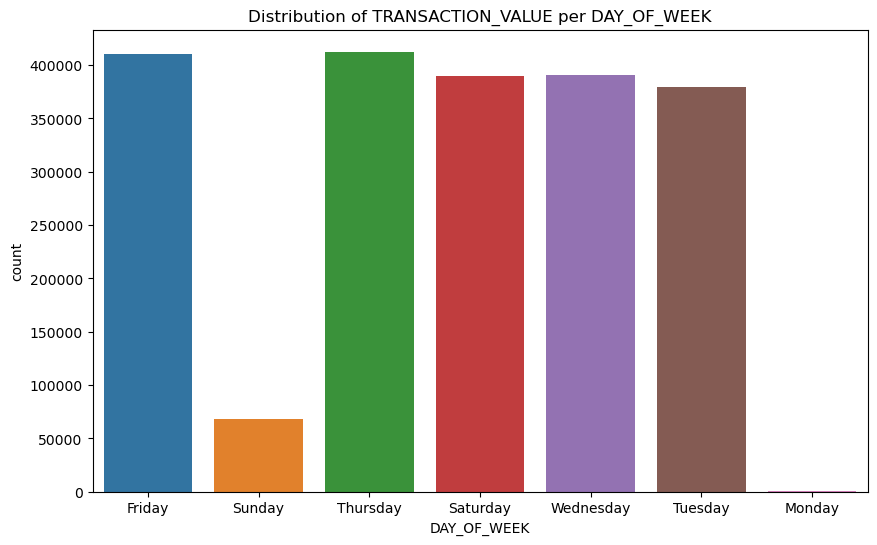

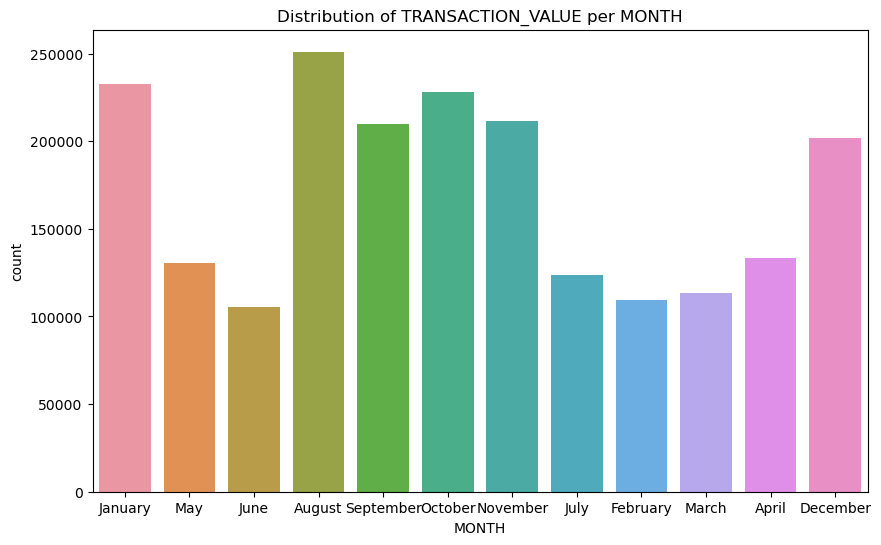

In [64]:
# Plot the distribution of the TRANSACTION_VALUE per TIME_OF_DAY, DAY_OF_WEEK and MONTH
# Plot the distribution of the TRANSACTION_VALUE per TIME_OF_DAY
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TIME_OF_DAY')
plt.title('Distribution of TRANSACTION_VALUE per TIME_OF_DAY')
plt.show()

# Plot the distribution of the TRANSACTION_VALUE per DAY_OF_WEEK
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DAY_OF_WEEK')
plt.title('Distribution of TRANSACTION_VALUE per DAY_OF_WEEK')
plt.show()

# Plot the distribution of the TRANSACTION_VALUE per MONTH
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='MONTH')
plt.title('Distribution of TRANSACTION_VALUE per MONTH')
plt.show()

In [70]:
df.columns

Index(['CUSTOMER_ID', 'DATE', 'PRODUCT_ID', 'QUANTITY', 'LIST_PRICE',
       'SPECIAL', 'OUTLET_ID', 'PAYMENT_METHOD', 'TIME', 'TOTAL_POINTS',
       'CREATION_DATE', 'REGIONAL_CODE', 'ORIGIN', 'LONGEVITY',
       'TRANSACTION_HOUR', 'TIME_OF_DAY', 'DAY_OF_WEEK', 'MONTH', 'WEEKDAY',
       'POINTS_SPENT', 'TRANSACTION_TYPE', 'TRANSACTION_VALUE'],
      dtype='object')

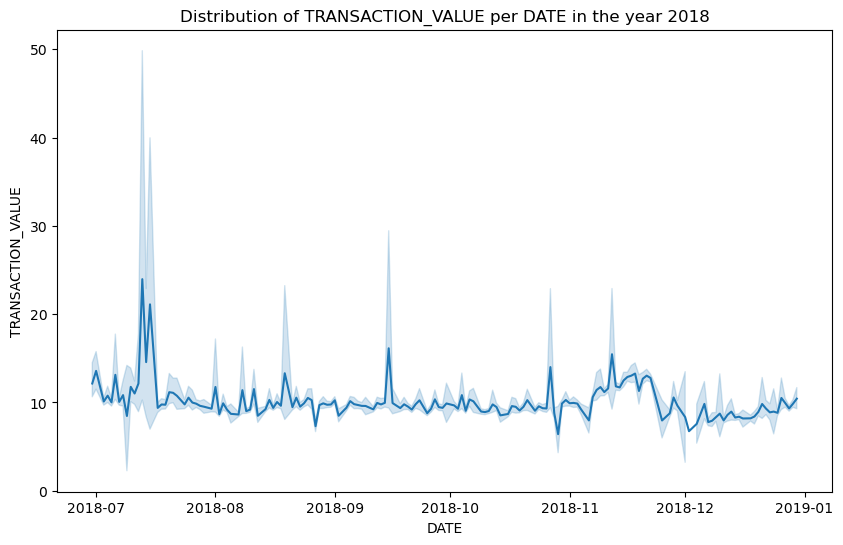

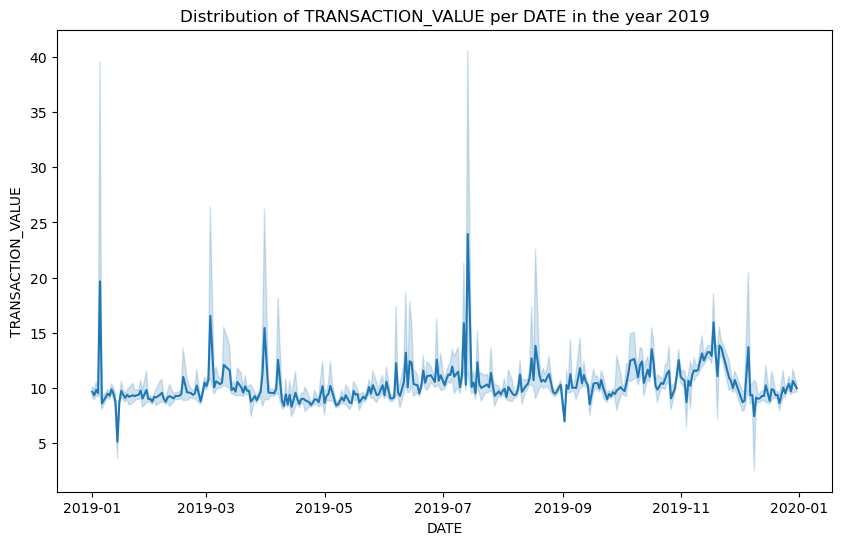

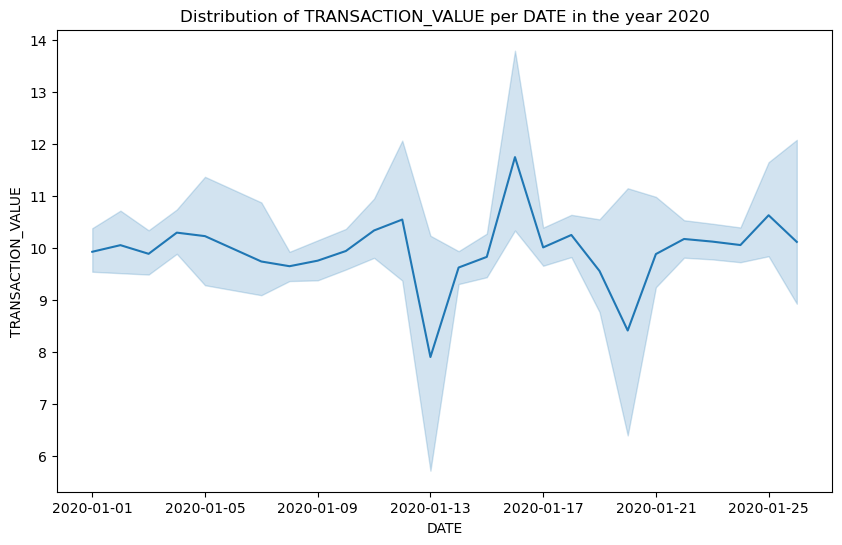

In [74]:
# Line plot of the TRANSACTION_VALUE per DATE in the year 2018, 2019 and 2020
# Plot the distribution of the TRANSACTION_VALUE per DATE in the year 2018
plt.figure(figsize=(10, 6))
df_2018 = df[df['DATE'].dt.year == 2018]
sns.lineplot(data=df_2018, x='DATE', y='TRANSACTION_VALUE')
plt.title('Distribution of TRANSACTION_VALUE per DATE in the year 2018')
plt.show()

# Plot the distribution of the TRANSACTION_VALUE per DATE in the year 2019
plt.figure(figsize=(10, 6))
df_2019 = df[df['DATE'].dt.year == 2019]
sns.lineplot(data=df_2019, x='DATE', y='TRANSACTION_VALUE')
plt.title('Distribution of TRANSACTION_VALUE per DATE in the year 2019')
plt.show()

# Plot the distribution of the TRANSACTION_VALUE per DATE in the year 2020
plt.figure(figsize=(10, 6))
df_2020 = df[df['DATE'].dt.year == 2020]
sns.lineplot(data=df_2020, x='DATE', y='TRANSACTION_VALUE')
plt.title('Distribution of TRANSACTION_VALUE per DATE in the year 2020')
plt.show()

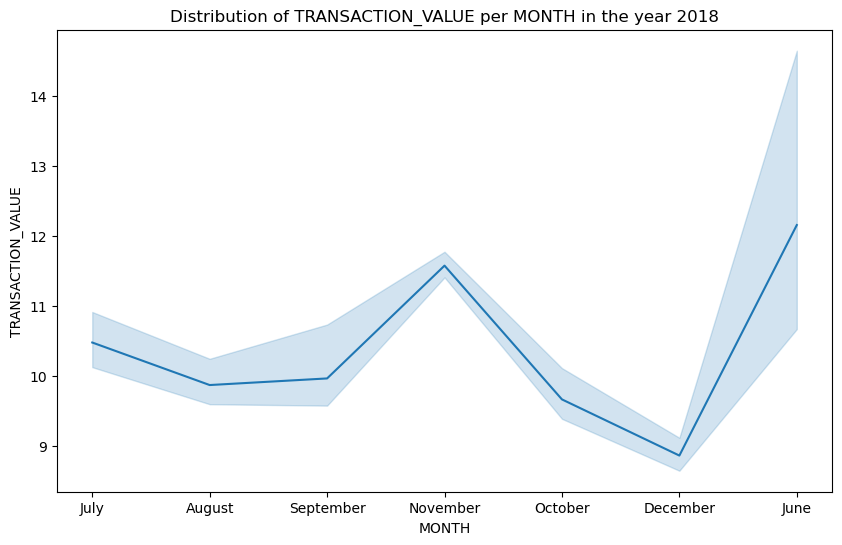

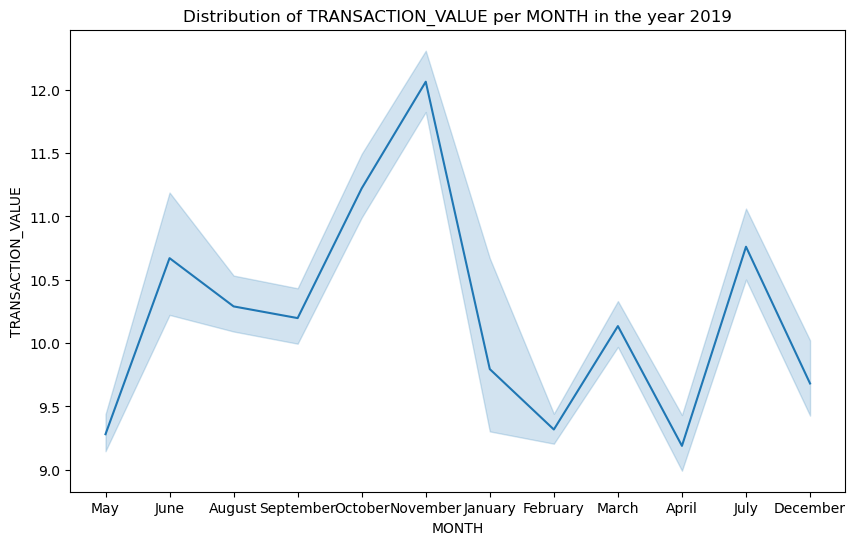

In [76]:
# Plot of the monthly transaction trends
# Plot the distribution of the TRANSACTION_VALUE per MONTH in the year 2018
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_2018, x='MONTH', y='TRANSACTION_VALUE')
plt.title('Distribution of TRANSACTION_VALUE per MONTH in the year 2018')
plt.show()

# Plot the distribution of the TRANSACTION_VALUE per MONTH in the year 2019
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_2019, x='MONTH', y='TRANSACTION_VALUE')
plt.title('Distribution of TRANSACTION_VALUE per MONTH in the year 2019')
plt.show()


In [81]:
df.shape

(2051168, 22)

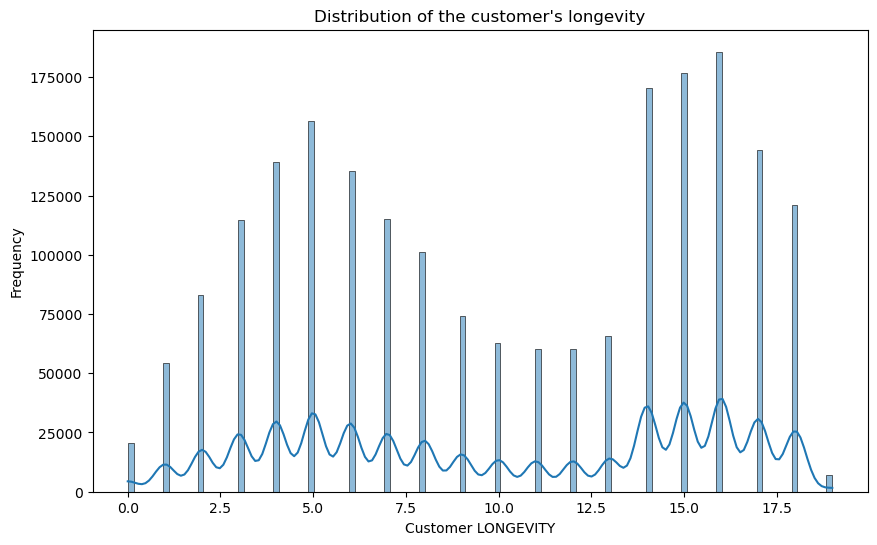

In [161]:
# Plot the distribution of the customer's longevity
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='LONGEVITY', kde=True)
plt.title('Distribution of the customer\'s longevity')
plt.xlabel('Customer LONGEVITY')
plt.ylabel('Frequency')
plt.show()


In [162]:
# Determination of the customer's spending power
total_transaction_value_df = df.groupby('CUSTOMER_ID')['TRANSACTION_VALUE'].sum()
total_transaction_value_df.head()

CUSTOMER_ID
AA00312188    1040.45
AA00312390     687.95
AA00325975    1386.30
AA00336843     498.10
AA00339761     574.80
Name: TRANSACTION_VALUE, dtype: float64

In [167]:
# Determination of day of the week with the highest transaction value order by the day of the week
day_of_week_transaction_value_df = df.groupby('DAY_OF_WEEK')['TRANSACTION_VALUE'].sum()
day_of_week_transaction_value_df.head()

DAY_OF_WEEK
Friday      4216975.83
Monday         9231.35
Saturday    4040033.28
Sunday       735405.29
Thursday    4155274.29
Name: TRANSACTION_VALUE, dtype: float64

In [168]:
# Determination of the hour of the day with the highest transaction value
hour_of_day_transaction_value_df = df.groupby('TRANSACTION_HOUR')['TRANSACTION_VALUE'].sum()
hour_of_day_transaction_value_df.head()

TRANSACTION_HOUR
0    6136.16
1     432.00
2    2097.75
3    2528.65
4    3081.05
Name: TRANSACTION_VALUE, dtype: float64

In [89]:
# Creation of new ORIGIN_ column that labels the ORIGIN column as MEMBER_GET_MEMBER - 0, PHONE - 1, STORE - 2, WEB - 3\
df['ORIGIN_'] = df['ORIGIN'].replace({'MEMBER_GET_MEMBER': 0, 'PHONE': 1, 'STORE': 2, 'WEB': 3})

In [169]:
# Determine the ORIGIN_ with the highest transaction value
origin_transaction_value_df = df.groupby('ORIGIN_')['TRANSACTION_VALUE'].sum()
origin_transaction_value_df.head()

ORIGIN_
0       11176.25
1     1031263.66
2     5622185.94
3    14115450.10
Name: TRANSACTION_VALUE, dtype: float64

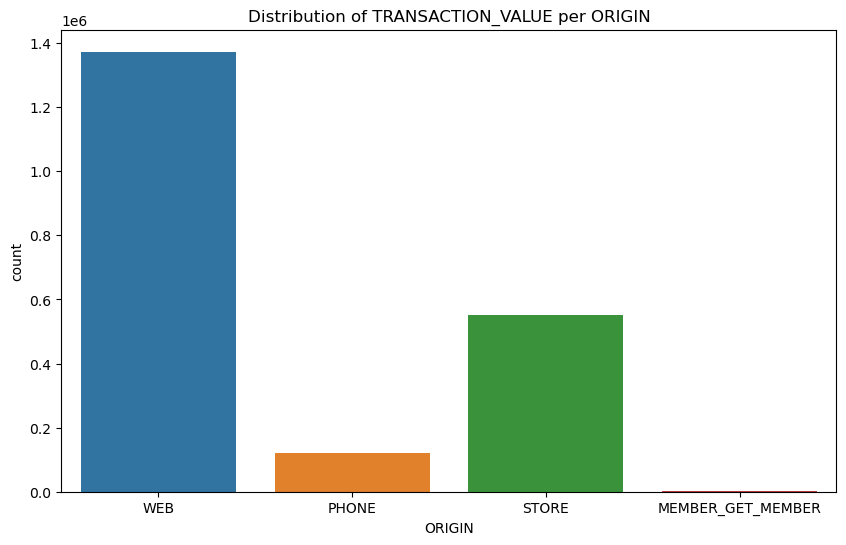

In [170]:
# Show the distribution of the TRANSACTION_VALUE per ORIGIN column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ORIGIN')
plt.title('Distribution of TRANSACTION_VALUE per ORIGIN')
plt.show()

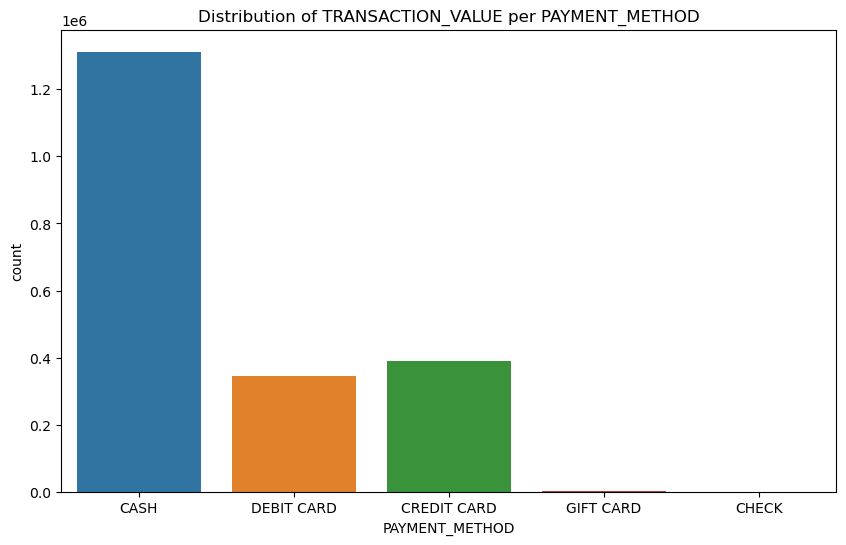

In [171]:
# Create PAYMENT_METHOD_ column that labels the PAYMENT_METHOD column as 'CASH': 0, 'CHECK': 1, 'CREDIT CARD': 2, 'DEBIT CARD': 3, 'GIFT CARD': 4
df['PAYMENT_METHOD_'] = df['PAYMENT_METHOD'].replace({'CASH': 0, 'CHECK': 1, 'CREDIT CARD': 2, 'DEBIT CARD': 3, 'GIFT CARD': 4})

# Determine the PAYMENT_METHOD_ with the highest transaction value
payment_method_transaction_value_df = df.groupby('PAYMENT_METHOD_')['TRANSACTION_VALUE'].sum()

# Show the distribution of the TRANSACTION_VALUE per PAYMENT_METHOD column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PAYMENT_METHOD')
plt.title('Distribution of TRANSACTION_VALUE per PAYMENT_METHOD')
plt.show()

In [172]:
# Determine the region with the highest transaction value
region_transaction_value_df = df.groupby('REGIONAL_CODE')['TRANSACTION_VALUE'].sum()
region_transaction_value_df.head()

REGIONAL_CODE
1    636289.94
2     53381.34
3    809272.70
4    300882.03
5    118778.93
Name: TRANSACTION_VALUE, dtype: float64

In [105]:
# Determining Frequency
# Creation of BillNo column
df['BILL_NO'] = range(1, len(df) + 1)

# Creation of freq column subsetted by BILL_NO and dropping duplicates
freq= df.drop_duplicates(subset="BILL_NO").groupby(["CUSTOMER_ID"])[["BILL_NO"]].count()

freq.head()

,BILL_NO
CUSTOMER_ID,
AA00312188,104
AA00312390,58
AA00325975,205
AA00336843,69
AA00339761,59


In [106]:
# Determining Recency
df['DATE2'] = pd.to_datetime(df['DATE'])
missing_dates = df[df['DATE'].isnull()]
recency = df.groupby(['CUSTOMER_ID']).agg({'DATE2': lambda x:((specific_date-x.max()).days)})
recency.head()

,DATE2
CUSTOMER_ID,
AA00312188,24
AA00312390,1
AA00325975,1
AA00336843,14
AA00339761,23


In [173]:
# Creation of region_, outlet, and category dataframes
# Region_
region_ = df.groupby('CUSTOMER_ID')['REGIONAL_CODE'].agg(lambda x: x.mode()[0] if not x.empty else None).reset_index()
region_.columns = ['CUSTOMER_ID', 'MODE_REGIONAL_CODE']

# Outlet
outlet = df.groupby('CUSTOMER_ID')['OUTLET_ID'].agg(lambda x: x.mode()[0] if not x.empty else None).reset_index()
outlet.columns = ['CUSTOMER_ID', 'OUTLET_ID']

# Category
category = df.groupby('CUSTOMER_ID')['CATEGORY_ID'].agg(lambda x: x.mode()[0] if not x.empty else None).reset_index()
category.columns = ['CUSTOMER_ID', 'CATEGORY_ID']


In [174]:
# Calculate the percentage of SPECIAL column for each customer_id
percentage_special = df.groupby('CUSTOMER_ID')['SPECIAL'].mean() * 100

# Round the values to 7 digits after the decimal point
percentage_special = percentage_special.round(2)

# Create a new table with customer_id and percentage_special columns
percentage_special_table = pd.DataFrame({'CUSTOMER_ID': percentage_special.index, 'Percentage_SPECIAL': percentage_special.values})


# add a new column to percentage_special table where the value is 1 if that customer ever bought a special product, and 0 otherwise
percentage_special_table['SPECIAL'] = percentage_special_table['Percentage_SPECIAL'].apply(lambda x: 1 if x > 0 else 0)

#show less rows for percentage_special_table
percentage_special_table[percentage_special_table['Percentage_SPECIAL']>0].head()


,CUSTOMER_ID,Percentage_SPECIAL,SPECIAL
12,AA00405977,0.89,1
30,AA01398403,0.51,1
32,AA01489475,0.70,1
33,AA01748903,1.03,1
35,AA02912403,0.42,1


In [175]:
# Mean of the SPECIAL column for each customer_id
mean_special = df.groupby('CUSTOMER_ID')['SPECIAL'].mean()
mean_special = mean_special.astype(int)
mean_special_table = pd.DataFrame({'CUSTOMER_ID': mean_special.index, 'Mean_SPECIAL': mean_special.values})

mean_special_table[mean_special_table['Mean_SPECIAL']>0].head()

,CUSTOMER_ID,Mean_SPECIAL


In [176]:
df.columns

Index(['CUSTOMER_ID', 'DATE', 'PRODUCT_ID', 'QUANTITY', 'LIST_PRICE',
       'SPECIAL', 'OUTLET_ID', 'PAYMENT_METHOD', 'TIME', 'TOTAL_POINTS',
       'CREATION_DATE', 'REGIONAL_CODE', 'ORIGIN', 'LONGEVITY',
       'TRANSACTION_HOUR', 'TIME_OF_DAY', 'DAY_OF_WEEK', 'MONTH', 'WEEKDAY',
       'POINTS_SPENT', 'TRANSACTION_TYPE', 'TRANSACTION_VALUE', 'ORIGIN_',
       'PAYMENT_METHOD_', 'BILL_NO', 'DATE2', 'CATEGORY_ID', 'CATEGORY_DESC',
       'SPECIAL_'],
      dtype='object')

In [177]:
origin_mode = df.groupby('CUSTOMER_ID')['ORIGIN_'].apply(lambda x: x.mode()[0] if not x.empty else None).reset_index()
origin_mode.columns = ['CUSTOMER_ID', 'MODE_ORIGIN']

payment_mode = df.groupby('CUSTOMER_ID')['PAYMENT_METHOD_'].apply(lambda x: x.mode()[0] if not x.empty else None).reset_index()
payment_mode.columns = ['CUSTOMER_ID', 'MODE_PAYMENT_METHOD']

transaction_mode = df.groupby('CUSTOMER_ID')['TRANSACTION_HOUR'].apply(lambda x: x.mode()[0] if not x.empty else None).reset_index()
transaction_mode.columns = ['CUSTOMER_ID', 'MODE_TRANSACTION_HOUR']

weekday_mode = df.groupby('CUSTOMER_ID')['WEEKDAY'].apply(lambda x: x.mode()[0] if not x.empty else None).reset_index()
weekday_mode.columns = ['CUSTOMER_ID', 'MODE_WEEKDAY']

customer_year = df.groupby('CUSTOMER_ID')['LONGEVITY'].first().reset_index()


In [178]:
total_transaction_value_df

CUSTOMER_ID
AA00312188    1040.45
AA00312390     687.95
AA00325975    1386.30
AA00336843     498.10
AA00339761     574.80
               ...   
YZ04556116      39.25
YZ04586406    1814.70
YZ04658257    1029.30
YZ04743693      81.45
YZ04933987     274.75
Name: TRANSACTION_VALUE, Length: 25727, dtype: float64

In [264]:
# RFM Analysis
RFM = pd.concat([recency, freq, total_transaction_value_df], axis=1)

In [265]:
RFM.rename(columns={'Recency': 'Recency'}, inplace=True)
RFM.rename(columns={'Frequency': 'Frequency'}, inplace=True)
RFM.rename(columns={'TRANSACTION_VALUE': 'Monetary'}, inplace=True)

In [266]:
RFM.head()

,Recency,Frequency,Monetary
CUSTOMER_ID,,,
AA00312188,24,104,1040.45
AA00312390,1,58,687.95
AA00325975,1,205,1386.30
AA00336843,14,69,498.10
AA00339761,23,59,574.80


In [267]:
# Merge loyalty points, region_, outlet, category, percentage_special_table, mean_special_table, origin_mode, payment_mode, transaction_mode, weekday_mode, and customer_year
RFM = RFM.merge(loyalty, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(region_, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(outlet, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(category, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(percentage_special_table, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(mean_special_table, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(origin_mode, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(payment_mode, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(transaction_mode, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(weekday_mode, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(customer_year, how='inner', on='CUSTOMER_ID')


In [268]:
RFM.head()

,CUSTOMER_ID,Recency,Frequency,Monetary,POINTS_SPENT,loyalty_score,MODE_REGIONAL_CODE,OUTLET_ID,CATEGORY_ID,Percentage_SPECIAL,SPECIAL,Mean_SPECIAL,MODE_ORIGIN,MODE_PAYMENT_METHOD,MODE_TRANSACTION_HOUR,MODE_WEEKDAY,LONGEVITY
0,AA00312188,24,104,1040.45,8760,1,11,64,10,0.0,0,0,3,0,14,3,14
1,AA00312390,1,58,687.95,2240,1,42,91,3,0.0,0,0,3,0,16,5,11
2,AA00325975,1,205,1386.30,80675,1,11,7,1,0.0,0,0,3,3,11,5,15
3,AA00336843,14,69,498.10,24255,1,11,6,3,0.0,0,0,3,0,13,3,5
4,AA00339761,23,59,574.80,4030,1,6,7,10,0.0,0,0,3,0,17,4,15


In [273]:
RFM_ = RFM.copy()
RFM_ = RFM_.drop(['POINTS_SPENT',
       'loyalty_score', 'MODE_REGIONAL_CODE', 'OUTLET_ID', 'CATEGORY_ID',
       'Percentage_SPECIAL', 'SPECIAL', 'Mean_SPECIAL', 'MODE_ORIGIN',
       'MODE_PAYMENT_METHOD', 'MODE_TRANSACTION_HOUR', 'MODE_WEEKDAY',
       'LONGEVITY'], axis=1)

In [274]:
RFM_.head()

,CUSTOMER_ID,Recency,Frequency,Monetary
0,AA00312188,24,104,1040.45
1,AA00312390,1,58,687.95
2,AA00325975,1,205,1386.30
3,AA00336843,14,69,498.10
4,AA00339761,23,59,574.80


In [275]:
# Obtain the quantiles of the RFM values for only the Recency, Frequency, and Monetary columns
# Subset only the Recency, Frequency, and Monetary columns
RFM_ = RFM_[['Recency', 'Frequency', 'Monetary']]
RFM_.head()

# Calculate the quantiles
quantiles = RFM_.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

# Add the CUSTOMER_ID to the RFM_
RFM_ = RFM[['CUSTOMER_ID', 'Recency', 'Frequency', 'Monetary']]
RFM_.head()


,CUSTOMER_ID,Recency,Frequency,Monetary
0,AA00312188,24,104,1040.45
1,AA00312390,1,58,687.95
2,AA00325975,1,205,1386.30
3,AA00336843,14,69,498.10
4,AA00339761,23,59,574.80


In [276]:
# Create a function that assigns a score of 1 to 4 to the recency, frequency, and monetary columns
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
# Assign the scores to the recency, frequency, and monetary columns
RFM_['R_quartile'] = RFM_['Recency'].apply(RScore, args=('Recency',quantiles,))
RFM_['F_quartile'] = RFM_['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
RFM_['M_quartile'] = RFM_['Monetary'].apply(FMScore, args=('Monetary',quantiles,))
RFM_.head()

,CUSTOMER_ID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,AA00312188,24,104,1040.45,2,3,4
1,AA00312390,1,58,687.95,4,2,3
2,AA00325975,1,205,1386.30,4,4,4
3,AA00336843,14,69,498.10,2,3,2
4,AA00339761,23,59,574.80,2,2,3


In [277]:
RFM_['RFM_Segment'] = RFM_.R_quartile.map(str)+RFM_.F_quartile.map(str)+RFM_.M_quartile.map(str)
RFM_['RFM_Score'] = RFM_[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

In [281]:
RFM_.head()

,CUSTOMER_ID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,AA00312188,24,104,1040.45,2,3,4,234,9
1,AA00312390,1,58,687.95,4,2,3,423,9
2,AA00325975,1,205,1386.30,4,4,4,444,12
3,AA00336843,14,69,498.10,2,3,2,232,7
4,AA00339761,23,59,574.80,2,2,3,223,7


In [282]:
print('Best Customers: ', len(RFM_[RFM_['RFM_Segment']=='111']))
print('Loyal Customers: ', len(RFM_[RFM_['F_quartile']==1]))
print('Highest Spenders: ', len(RFM_[RFM_[ 'M_quartile']==1]))
print('Nearly Lost: ', len(RFM_[RFM_[ 'RFM_Segment']=='134']))
print('Lost Customers: ', len(RFM_[RFM_['RFM_Segment']=='344']))
print('Lost Low Value Customers: ', len(RFM_[RFM_['RFM_Segment']=='444']))

Best Customers:  3098
Loyal Customers:  6505
Highest Spenders:  6432
Nearly Lost:  104
Lost Customers:  2131
Lost Low Value Customers:  2237


In [280]:
## Function to check skewness
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

Recency's: Skew: 4.008475793773472, : SkewtestResult(statistic=122.74328020667116, pvalue=0.0)
Frequency's: Skew: 2.26365700663906, : SkewtestResult(statistic=93.28467955075874, pvalue=0.0)
Monetary's: Skew: 32.245250953171215, : SkewtestResult(statistic=233.75941092982643, pvalue=0.0)


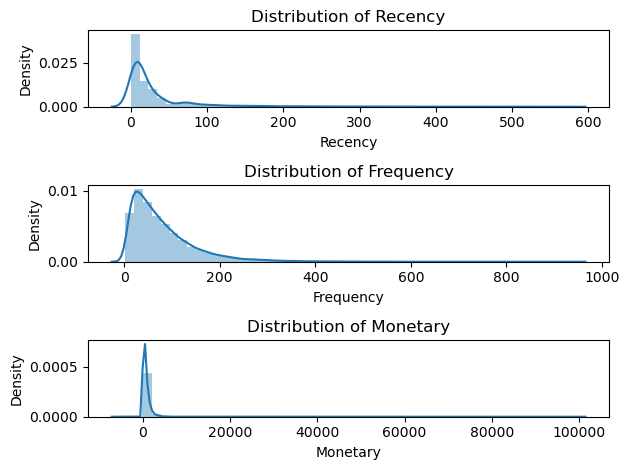

In [248]:
# plt.subplot(3, 1, 1)
# check_skew(RFM_,'Recency')
# plt.subplot(3, 1, 2)
# check_skew(RFM_,'Frequency')
# plt.subplot(3, 1, 3)
# check_skew(RFM_,'Monetary')
# plt.tight_layout()

Recency's: Skew: nan, : SkewtestResult(statistic=nan, pvalue=nan)
Frequency's: Skew: nan, : SkewtestResult(statistic=nan, pvalue=nan)
Monetary's: Skew: nan, : SkewtestResult(statistic=nan, pvalue=nan)


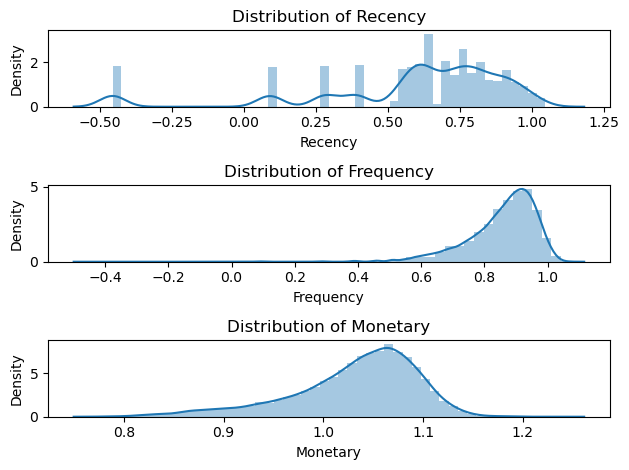

In [252]:
# # Remove Skewness
# RFM_['Recency'] = np.log1p(RFM_['Recency'])
# RFM_['Frequency'] = np.log1p(RFM_['Frequency'])
# RFM_['Monetary'] = np.log1p(RFM_['Monetary'])

# plt.subplot(3, 1, 1)
# check_skew(RFM_,'Recency')
# plt.subplot(3, 1, 2)
# check_skew(RFM_,'Frequency')
# plt.subplot(3, 1, 3)
# check_skew(RFM_,'Monetary')
# plt.tight_layout()


In [285]:
# Scale the data
scaler = StandardScaler()
RFM1_scaled = scaler.fit_transform(RFM_.iloc[:,1:4])

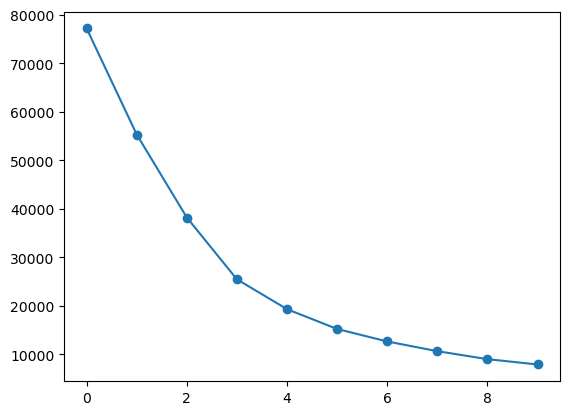

In [286]:
inertia = []
for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(RFM1_scaled)
    inertia.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt    
plt.plot(inertia,marker="o")

In [288]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(RFM1_scaled)
RFM["Clusters"] =(kmeans.labels_)

In [289]:
RFM1_scaled = pd.DataFrame(RFM1_scaled, columns=RFM_.columns[1:4])
RFM1_scaled.head()

,Recency,Frequency,Monetary
0,-0.181601,0.349789,0.162292
1,-0.540697,-0.313133,-0.083515
2,-0.540697,1.805333,0.403461
3,-0.337730,-0.154608,-0.215901
4,-0.197214,-0.298721,-0.162417


In [290]:
RFM

,CUSTOMER_ID,Recency,Frequency,Monetary,POINTS_SPENT,loyalty_score,MODE_REGIONAL_CODE,OUTLET_ID,CATEGORY_ID,Percentage_SPECIAL,SPECIAL,Mean_SPECIAL,MODE_ORIGIN,MODE_PAYMENT_METHOD,MODE_TRANSACTION_HOUR,MODE_WEEKDAY,LONGEVITY,Clusters
0,AA00312188,24,104,1040.45,8760,1,11,64,10,0.0,0,0,3,0,14,3,14,1
1,AA00312390,1,58,687.95,2240,1,42,91,3,0.0,0,0,3,0,16,5,11,1
2,AA00325975,1,205,1386.30,80675,1,11,7,1,0.0,0,0,3,3,11,5,15,0
3,AA00336843,14,69,498.10,24255,1,11,6,3,0.0,0,0,3,0,13,3,5,1
4,AA00339761,23,59,574.80,4030,1,6,7,10,0.0,0,0,3,0,17,4,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25722,YZ04556116,173,9,39.25,0,0,46,114,1,0.0,0,0,2,0,13,1,1,2
25723,YZ04586406,9,82,1814.70,0,0,23,85,3,0.0,0,0,1,0,12,3,2,1
25724,YZ04658257,2,116,1029.30,110880,1,26,35,3,0.0,0,0,1,2,15,4,2,1
25725,YZ04743693,25,14,81.45,0,0,3,113,3,0.0,0,0,2,0,11,2,5,1
